In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# Import data
data3 = pd.read_csv("dataset 4/data3.txt", header=None)
data3.columns = ["X_i"]

In [4]:
# Check some stuff
print(data3.shape)
data3.describe()

(1000, 1)


,X_i
count,1000.000000
mean,5.132045
std,2.273665
min,0.871575
25%,3.495113
50%,4.829283
75%,6.408520
max,15.879810


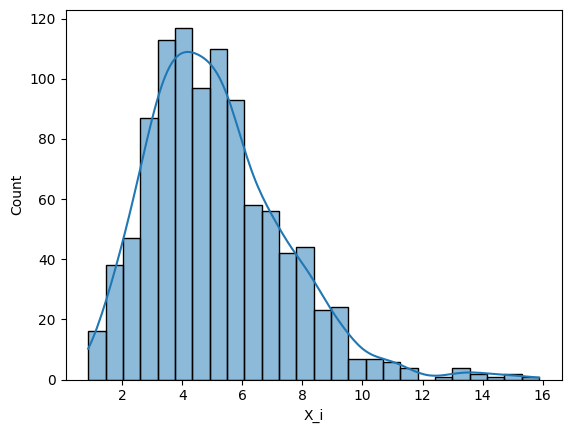

In [5]:
sns.histplot(data3["X_i"], kde = True)
plt.show()

In [6]:
# The distribution is positive and has a tail. Let's compare the qqplots
# of various distributions

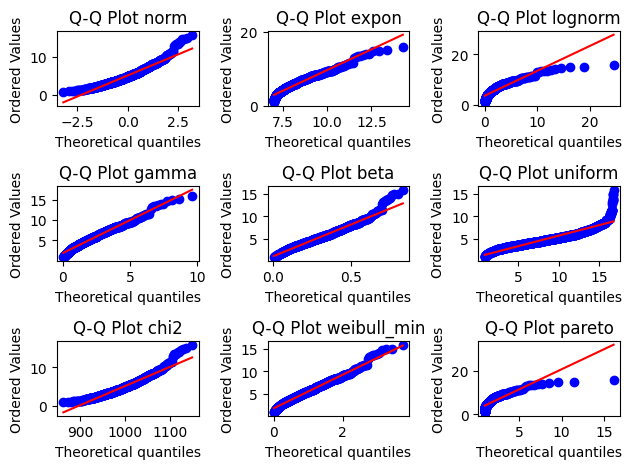

In [7]:
dists = {"norm": (), "expon": (7, ), "lognorm": (1, ), "gamma": (2, ), "beta": (2, 5),
         "uniform":(min(data3["X_i"]), max(data3["X_i"])), "chi2": (999, ), "weibull_min": (1.5, ), "pareto": (2.62, )}
fig, axes = plt.subplots(nrows=3, ncols=3)

axes = axes.flatten()

for i, d in enumerate(dists):
    sparams = dists.get(d, ())
    ax = axes[i]
    stats.probplot(data3["X_i"], dist=d, sparams = sparams, plot = ax)
    
    ax.set_title(label = "Q-Q Plot " + d)
    
plt.tight_layout()
plt.show()

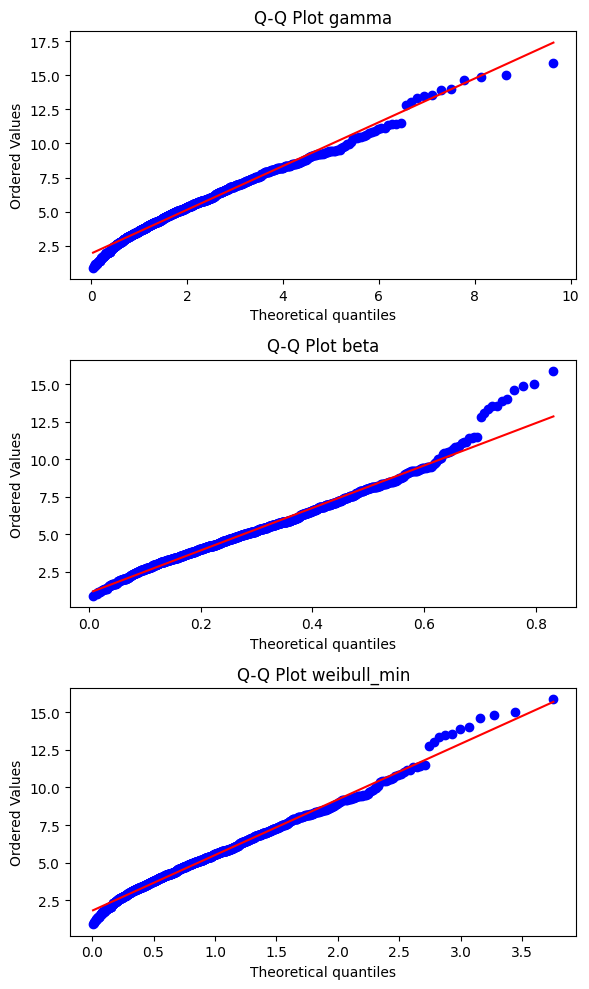

In [8]:
# Weibull, beta, and gamma distributions seem worth looking into.
dists = {"gamma": (2, ), "beta": (2, 5), "weibull_min": (1.5, )}
fig, axes = plt.subplots(nrows=3, figsize=(6, 10))

axes = axes.flatten()

for i, d in enumerate(dists):
    sparams = dists.get(d, ())
    ax = axes[i]
    stats.probplot(data3["X_i"], dist=d, sparams = sparams, plot = ax)
    
    ax.set_title(label = "Q-Q Plot " + d)
    
plt.tight_layout()
plt.show()

In [19]:
from scipy.stats import shapiro, kstest, anderson

# Kolmogorov-Smirnov Test against a normal distribution
ks_test = kstest(data3['X_i'], 'gamma', args=(5, ))
print('Kolmogorov-Smirnov Test:', ks_test)


Kolmogorov-Smirnov Test: KstestResult(statistic=0.03389819629412799, pvalue=0.19619428446990317, statistic_location=3.123501, statistic_sign=-1)


In [ ]:
# As stated the data is generated from a gamma distribution

### $\beta$:
$$ \hat{\beta}_{MME} = \frac{ \sum_{i=1}^{n}{X_i}^2 - \frac{ \left( \sum_{i=1}^{n}{X_i} \right)^2 }{n} } { \sum_{i=1}^{n}{X_i} } $$

$$ \beta_{MLE} = \frac{\sum_{i=1}^{n}{X_i}}{n\alpha} = \frac{\overline{x}}{\alpha}$$

### $\alpha$:



$$ \alpha_{MME} = \frac{\sum_{i=1}^{n}{X_i}}{n\beta} = \frac{\overline{x}}{\beta}$$

There is no closed form for alpha's MLE estimator

In [45]:
# Calculate Beta parameter:

random_sample3 = data3["X_i"].sample(100, replace=False, random_state = 1982)

sum_x = sum(random_sample3.values)
sum_x2 = sum(random_sample3.values ** 2)

b_mme = (sum_x2 - (sum_x ** 2) / 1000) / sum_x

print("beta:", b_mme)

# Calculate Alpha parameter:

a_mme = sum_x / (100 * b_mme)

print("alpha:", a_mme)


beta: 5.478862416075146


0.9287504382424717